In [1]:
import sys  
sys.path.insert(0, '/home/dfki/Desktop/Thesis/hyperopt')
import temp
import pickle
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import random
from hyperopt import fmin, tpe, hp, STATUS_OK,Trials,trials_from_docs
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import random
import pickle
import numpy as np

In [2]:
#load trial from openml
trial_3 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/3/trial_3.p", "rb"))


In [3]:
#load trials from hyperopt history
# all_trials = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/dima/3/10000it_0in_3.p", "rb"))
# trial_3 = temp.remove_zero_trial(all_trials)

In [4]:
vector_3 = temp.vector_builder(trial_3)
X = np.array(vector_3)

len vector is 21249


           data_index
cluster_1            
0               21249
---------------------------------------
           data_index  cluster_1
cluster_2                       
0               21189      21189
1                  60         60
---------------------------------------
           data_index  cluster_1  cluster_2
cluster_3                                  
0               21138      21138      21138
1                  60         60         60
2                  51         51         51
---------------------------------------
           data_index  cluster_1  cluster_2  cluster_3
cluster_4                                             
0               21072      21072      21072      21072
1                  60         60         60         60
2                  51         51         51         51
3                  66         66         66         66
---------------------------------------
           data_index  cluster_1  cluster_2  cluster_3  cluster_4
cluster_5                 

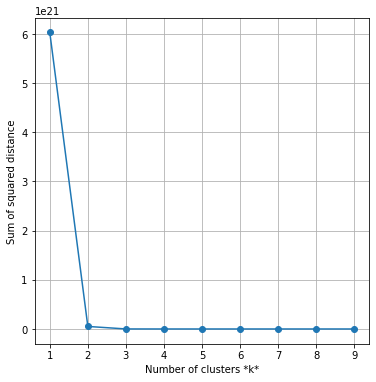

In [5]:
#find the best K 
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))
cluster_map = pd.DataFrame()
cluster_map['data_index'] = range(0,X.shape[0])

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
    cluster_map['cluster_{}'.format(k)] = km.labels_
    print(cluster_map.groupby('cluster_{}'.format(k)).count())
    print("---------------------------------------")

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.grid(True)


In [6]:
def selecet_index_base_kmeans(X,k,min_member):
    '''
    X: np.array
    k: number of k in kmeans
    min_member: number of sample should take out of each cluster
    '''
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

    cluster_map = pd.DataFrame()
    cluster_map['data_index'] = range(0,X.shape[0])
    cluster_map['cluster'] = kmeans.labels_

    selected_index=[]
    for i in range(k):
        l = cluster_map[cluster_map.cluster == i].index
        if len(l)<=min_member:
            selected_index = list(l)+ list(selected_index)
        else:
            sampling = random.choices(l, k=min_member)
            selected_index = list(selected_index) + list(sampling)
        l=[]
    
    return selected_index
    
selected_index = selecet_index_base_kmeans(X,k=3,min_member=51)  
print(len(selected_index))

153


In [7]:
trial3_basedkmeasn = temp.sepecialindex_trial_builder(trial_3,selected_index)
print(len(trial3_basedkmeasn.trials))

153


In [8]:
#save the result
#pickle.dump(trial3_basedkmeasn, open('/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/trial3_basekmeans_k=3_hyperopt.p', 'wb'))